In [767]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [768]:
def plot_hist(ax, data, bins=24, title="gauss hist"):

    ax.grid()
    ax.hist(data, normed=True, bins=bins)
    ax.set_title(title)

### Get the data set

In [769]:
df = pd.read_csv('eurotunnel_3_months.csv', index_col=False, header=0);

#### check what is all about

In [770]:
df.head()

,terminal,servicetype,departures,waitingtimeminutes,journeytimeminutes,delayreason,retrievaldate,latitude,longitude,trend
0,UK,normal,6,0,60,none/unknown,2018-02-01 00:13:06.432,51.0963,1.13505,stable
1,F,normal,4,0,60,none/unknown,2018-02-01 00:13:06.57,50.9239,1.81604,stable
2,UK,normal,6,0,60,none/unknown,2018-02-01 00:42:53.941,51.0963,1.13505,stable
3,F,normal,5,0,60,none/unknown,2018-02-01 00:42:54.08,50.9239,1.81604,stable
4,UK,normal,4,0,60,none/unknown,2018-02-01 01:12:54.094,51.0963,1.13505,stable


In [771]:
### ADD TOTAL TIME JUST IN CASE
df['totaltime']    = df.waitingtimeminutes    + df.journeytimeminutes

### Try to get some insight on the data

In [772]:
# defensive measures
print(len(df[df['waitingtimeminutes']==90]))

# check for imbalancement

fr = df[df['terminal'] == "F"]
uk = df[df['terminal'] == "UK"]
print(len(fr), len(uk))

118
4259 4259


#### CHECK DELAY DISTRIBUTION

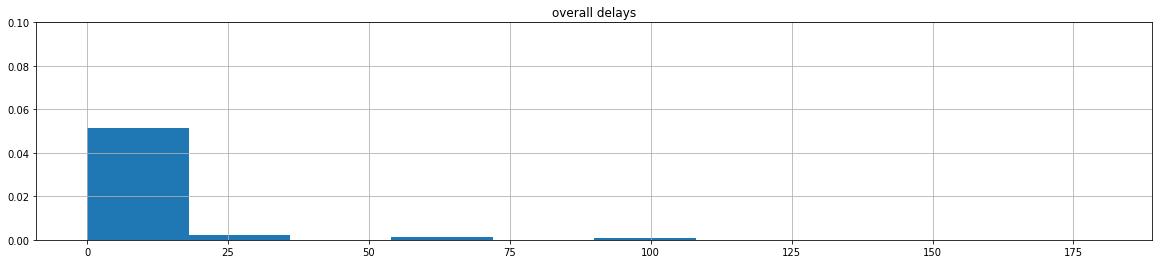

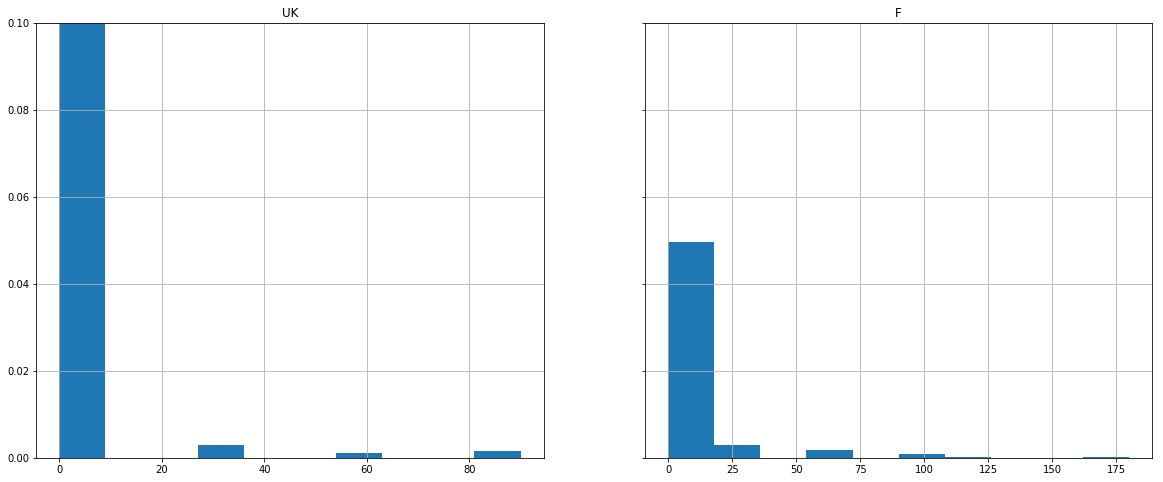

In [773]:
delays    = df['waitingtimeminutes']
delays_UK = df[df['terminal']=='UK']['waitingtimeminutes']
delays_FR = df[df['terminal']=='F']['waitingtimeminutes']

fig, ax = plt.subplots(sharey=True, figsize=(20,4))
mmm = 10
plt.ylim(0, mmm/100)
plot_hist(ax,  delays,    bins=mmm, title="overall delays")

fig, (ax_uk, ax_fr) = plt.subplots(1, 2, sharey=True, figsize=(20,8))
plt.ylim(0, mmm/100)
plot_hist(ax_uk, delays_UK, bins=mmm, title="UK")
plt.ylim(0, mmm/100)
plot_hist(ax_fr, delays_FR, bins=mmm, title="F")

##### Apparently there is not much delays, the frech side has more and longer ones. Check a bit just in case

In [774]:
cntuk = len(delays_UK[delays_UK==0])
cntfr = len(delays_FR[delays_FR==0])
cnt   = len(delays[delays==0])

_df = pd.DataFrame(data={'all':[cnt], 'UK':[cntuk], 'FR':[cntfr]})
_df

,FR,UK,all
0,3803,4045,7848


##### All seems in order, data is consistent

### Lets figure a Hipotesis: "delays are dependent on some TIME factors like day of week" and of course, the tunnel end

In [775]:
import datetime

df['dow'] = df.apply(lambda row: datetime.datetime.strptime(row['retrievaldate'][0:19], '%Y-%m-%d %H:%M:%S').weekday(), axis=1)
df['idterminal'] = df.apply(lambda row: 1 if row['terminal']=='UK' else 2, axis=1)

In [776]:
df.head()

,terminal,servicetype,departures,waitingtimeminutes,journeytimeminutes,delayreason,retrievaldate,latitude,longitude,trend,totaltime,dow,idterminal
0,UK,normal,6,0,60,none/unknown,2018-02-01 00:13:06.432,51.0963,1.13505,stable,60,3,1
1,F,normal,4,0,60,none/unknown,2018-02-01 00:13:06.57,50.9239,1.81604,stable,60,3,2
2,UK,normal,6,0,60,none/unknown,2018-02-01 00:42:53.941,51.0963,1.13505,stable,60,3,1
3,F,normal,5,0,60,none/unknown,2018-02-01 00:42:54.08,50.9239,1.81604,stable,60,3,2
4,UK,normal,4,0,60,none/unknown,2018-02-01 01:12:54.094,51.0963,1.13505,stable,60,3,1


In [777]:
df_UK = df[df['terminal']=='UK']
df_FR = df[df['terminal']=='F']

reg = np.array([df['idterminal'], df['dow'], df['waitingtimeminutes']]).transpose()
reg_UK = np.array([df_UK['idterminal'], df_UK['dow'], df_UK['waitingtimeminutes']]).transpose()
reg_FR = np.array([df_FR['idterminal'], df_FR['dow'], df_FR['waitingtimeminutes']]).transpose()

In [778]:
def scatter_plot_1(reg, reg_UK, reg_FR, scaled=False, marker='x', color='b'):
    
    _min = min(reg[:,2])
    _max = max(reg[:,2])
    if scaled:
        s = [(n + 1000)/(n+1) for n in range(len(x))]
    else:
        s = 50
    
    _max = max(reg[:,2]) + 25
    plt.subplots(1, 3, sharey=True, figsize=(20,20))
    plt.subplot(331)
    plt.ylim(-10, _max)
    plt.scatter(reg_UK[:,1], reg_UK[:,2], s=s, color=color, marker=marker)
    plt.grid()
    plt.title("dow, delay scatter UK")

    plt.subplot(332)
    plt.ylim(-10, _max)
    plt.scatter(reg_FR[:,1], reg_FR[:,2], s=s, color=color, marker=marker)
    plt.grid()
    plt.title("dow, delay scatter FR")

    plt.subplot(333)
    plt.ylim(-10, _max)
    plt.scatter(reg[:,1], reg[:,2], s=s, color=color, marker=marker)
    plt.grid()
    plt.title("dow, delay scatter ALL")

def plot_time_series(ts, title, color='b', maxV=None):
    
    if not maxV:
        maxV = max(ts)
    
    plt.subplots(1, 1, sharey=True, figsize=(20,10))
    plt.ylim(0, maxV, 10)
    plt.plot(ts)
    plt.grid()
    plt.title(title)



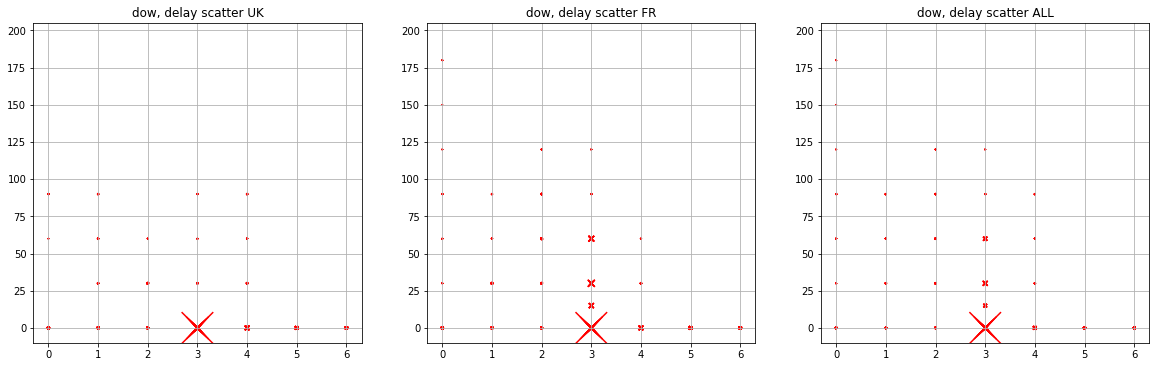

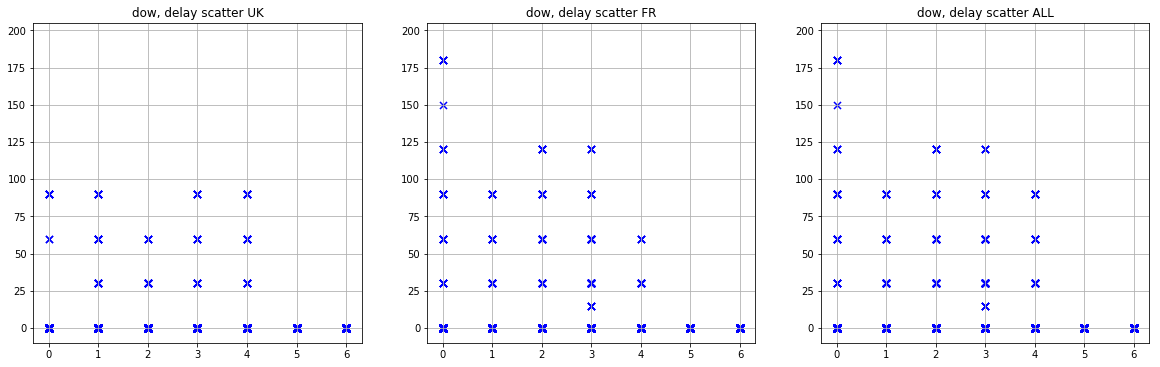

In [779]:
scatter_plot_1(reg, reg_UK, reg_FR, scaled=True, marker='x', color='r')
scatter_plot_1(reg, reg_UK, reg_FR, scaled=False)

#### THE HIPOTESIS SEEMS TRUE, THE DAY OF WEEK HAS SOMETHING TO DO WITH DELAYS, FOR EXAMPLE, FRANCE HAS A LOT OF DELAYS ON SUNDAY

####Can be a spurious correlation or maybe a single anomaly, lets check sundays distribution. Then I will try to correlate with the other end, something is fishy here, how its possible that a delay on France do not affect UK end ?!

In [780]:
dist_sun_FR = df.loc[(df['idterminal']==2) & (df['dow']==0)]
dist_sun_FR.head()

,terminal,servicetype,departures,waitingtimeminutes,journeytimeminutes,delayreason,retrievaldate,latitude,longitude,trend,totaltime,dow,idterminal
389,F,normal,4,0,60,none/unknown,2018-02-05 00:13:12.218,50.9239,1.81604,stable,60,0,2
391,F,normal,2,0,60,none/unknown,2018-02-05 00:42:56.006,50.9239,1.81604,stable,60,0,2
393,F,normal,2,0,60,none/unknown,2018-02-05 01:12:57.035,50.9239,1.81604,stable,60,0,2
395,F,normal,5,0,60,none/unknown,2018-02-05 01:42:54.838,50.9239,1.81604,stable,60,0,2
397,F,normal,2,0,60,none/unknown,2018-02-05 02:13:05.202,50.9239,1.81604,stable,60,0,2


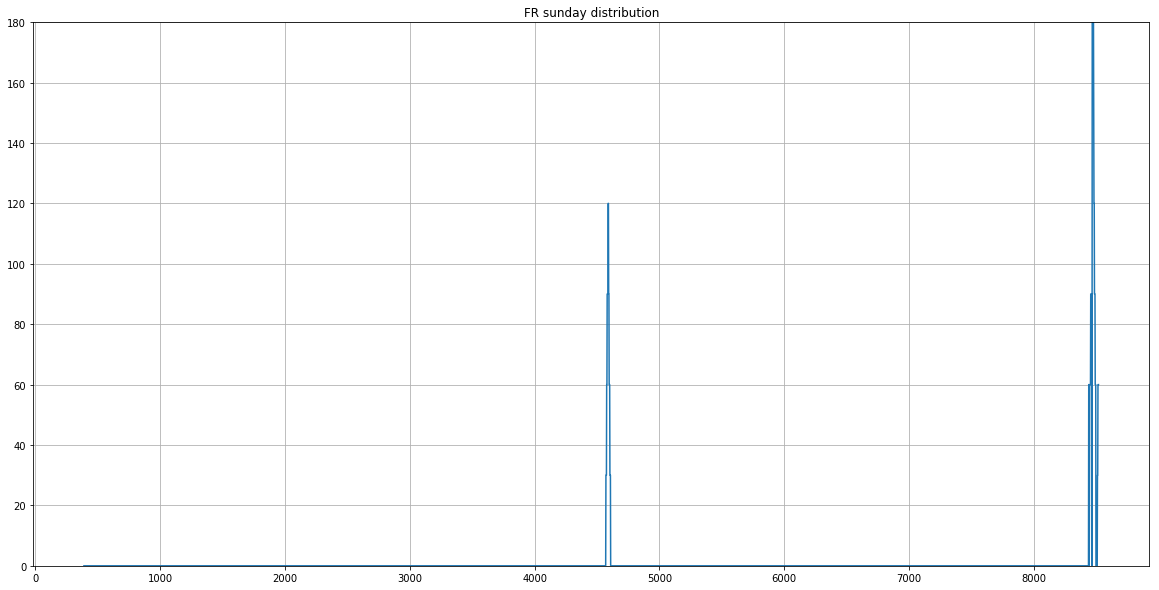

In [781]:
plot_time_series(dist_sun_FR['waitingtimeminutes'], "FR sunday distribution")

#### OK, NOT ALL SUNDAYS WE OBSERVE DELAYS, APPARENTLY ONLY TWO, LETS PLOT THE DELAY DISTRIBUTION

51


,terminal,servicetype,departures,waitingtimeminutes,journeytimeminutes,delayreason,retrievaldate,latitude,longitude,trend,totaltime,dow,idterminal
4571,F,delayed,1,30,180,an earlier incident on our Calais terminal whi...,2018-03-19 11:43:06.654,50.9239,1.81604,increasing,210,0,2
4573,F,delayed,1,30,210,an incident on the terminal which is being res...,2018-03-19 12:13:05.967,50.9239,1.81604,increasing,240,0,2
4575,F,delayed,4,30,240,an incident on the terminal which is being res...,2018-03-19 12:42:54.706,50.9239,1.81604,increasing,270,0,2
4577,F,delayed,2,60,240,an incident on the terminal which is being res...,2018-03-19 13:12:55.429,50.9239,1.81604,increasing,300,0,2
4579,F,delayed,2,60,240,an incident on the terminal which is being res...,2018-03-19 13:42:55.596,50.9239,1.81604,stable,300,0,2


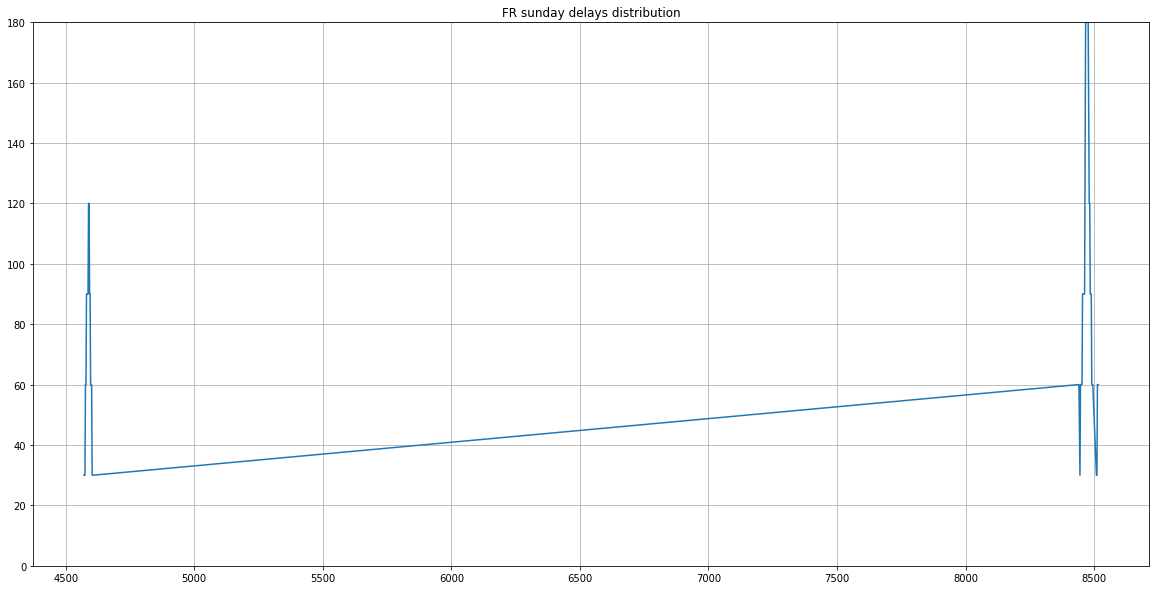

In [782]:
dist_sun_FR_0 = dist_sun_FR.loc[dist_sun_FR['waitingtimeminutes']>0]
print(len(dist_sun_FR_0))
plot_time_series(dist_sun_FR_0['waitingtimeminutes'], "FR sunday delays distribution")
dist_sun_FR_0.head()

#### SAME AS EXPECTED, ONLY TWO SUNDAYS, NOT A HUGE PROBLEM, SAY 2/12 = 1/6 = 33% PROBABILITY OF HAVING PROBLEMS ON SUNDAY, CAN BE A COINCIDENCE OR NOT

#### ACCORDING TO THIS, WE NEED TO PLOT ALL DOW DELAY DISTRIBUTIONS

### LETS DO THE SAME WITH THE NUMBER OF DEPARTURES - MAYBE HAS SOMETHING TO DO

In [783]:
reg_d = np.array([df['idterminal'], df['departures'], df['waitingtimeminutes']]).transpose()
reg_UK_d = np.array([df_UK['idterminal'], df_UK['departures'], df_UK['waitingtimeminutes']]).transpose()
reg_FR_d = np.array([df_FR['idterminal'], df_FR['departures'], df_FR['waitingtimeminutes']]).transpose()

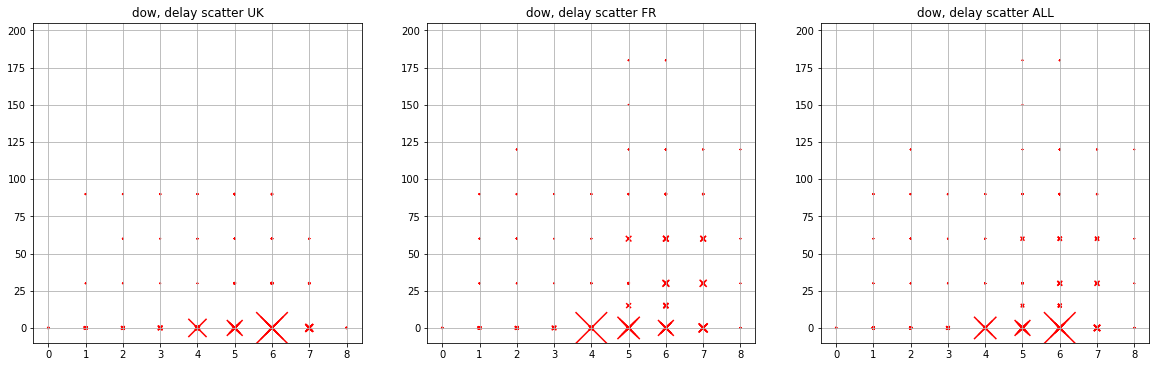

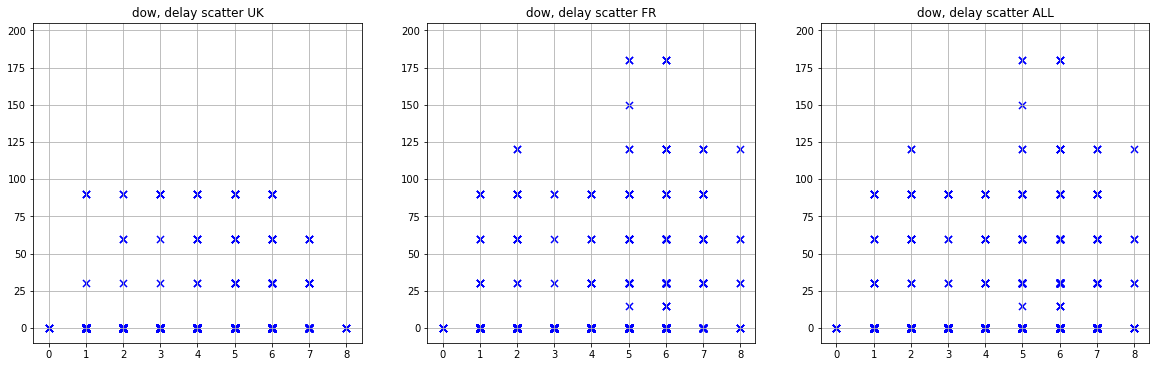

In [784]:
scatter_plot_1(reg_d, reg_UK_d, reg_FR_d, scaled=True, marker='x', color='r')
scatter_plot_1(reg_d, reg_UK_d, reg_FR_d, scaled=False)

### Apparently not a many relevant one, there are some delays with 6 departures on France, while UK has consistent delays. - OF COURSE there is some knowlegde here and we need to explore it further -

## NOW IS THE TURN TO COMPUTE JOURNEY TIMES INCLUIDING DELAYS WHICH IS RELEVANT TO BUSINESS

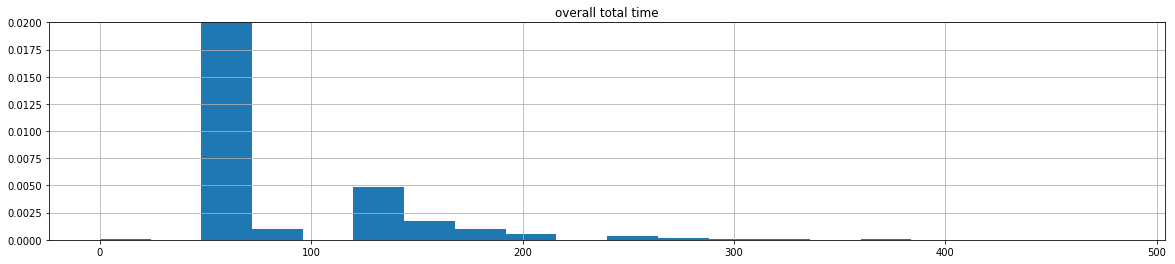

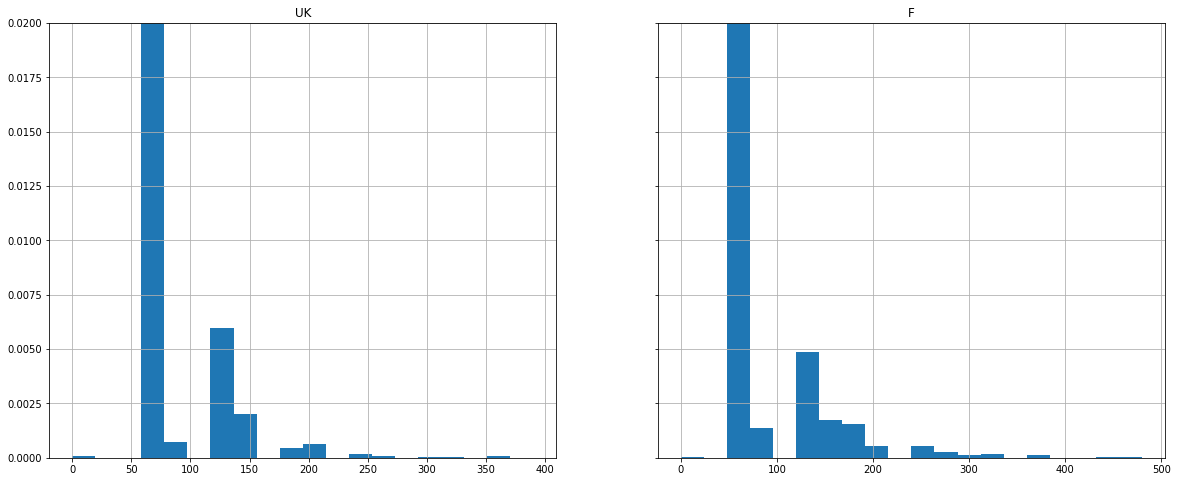

In [785]:
totaltime    = df['totaltime']
totaltime_UK = df[df['terminal']=='UK']['totaltime']
totaltime_FR = df[df['terminal']=='F']['totaltime']

fig, ax = plt.subplots(sharey=True, figsize=(20,4))
mmm = 20
plt.ylim(0, mmm/1000)
plot_hist(ax,  totaltime,    bins=mmm, title="overall total time")
fig, (ax_uk, ax_fr) = plt.subplots(1, 2, sharey=True, figsize=(20,8))

plt.ylim(0, mmm/1000)
plot_hist(ax_uk, totaltime_UK, bins=mmm, title="UK")

plt.ylim(0, mmm/1000)
plot_hist(ax_fr, totaltime_FR, bins=mmm, title="F")

### FRANCE HAS MORE HOMOGENEOUS TOTAL TIMES BECAUSE OF DELAYS THAN FRANCE. LETS TRY A SCATTER PLOT AS DID BEFORE, ONLY FOR DOW

In [786]:
reg_tt_d = np.array([df['idterminal'], df['dow'], df['totaltime']]).transpose()
reg_tt_UK_d = np.array([df_UK['idterminal'], df_UK['dow'], df_UK['totaltime']]).transpose()
reg_tt_FR_d = np.array([df_FR['idterminal'], df_FR['dow'], df_FR['totaltime']]).transpose()

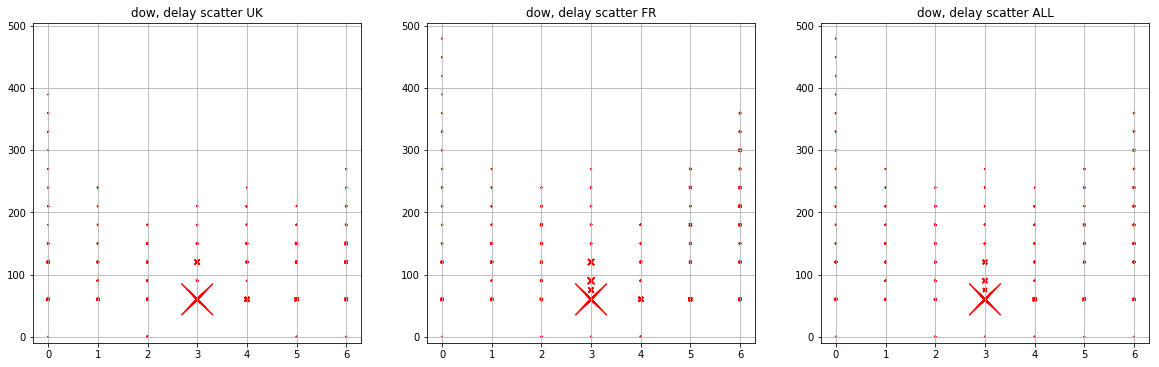

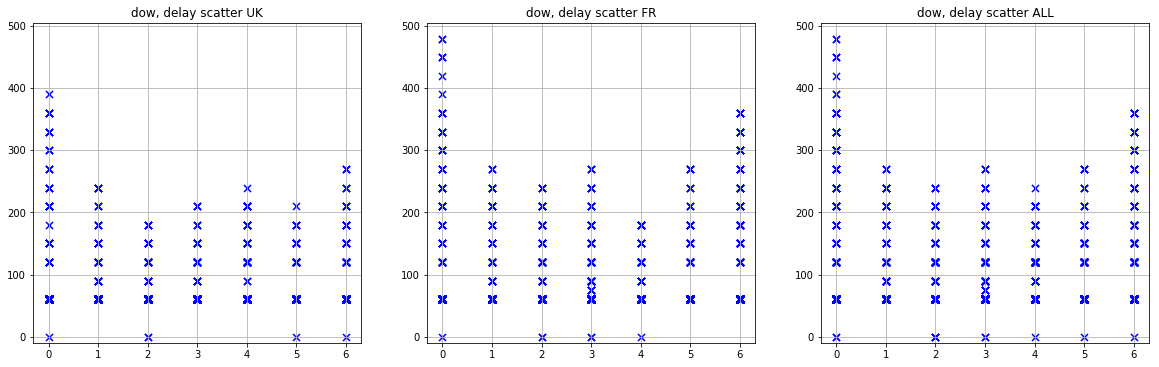

In [787]:
scatter_plot_1(reg_tt_d, reg_tt_UK_d, reg_tt_FR_d, scaled=True, marker='x', color='r')
scatter_plot_1(reg_tt_d, reg_tt_UK_d, reg_tt_FR_d, scaled=False)

## TIME TO DO SOME PREDICTIONS

### FIRST plot our series, the most relevant is total travel time, including delays, so, plot  first.

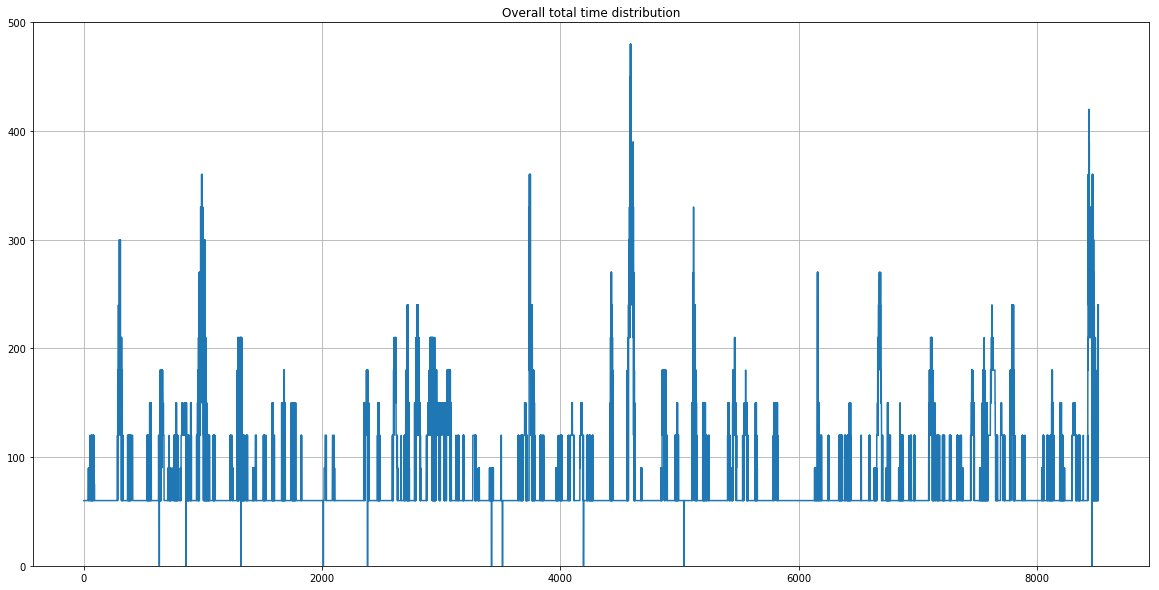

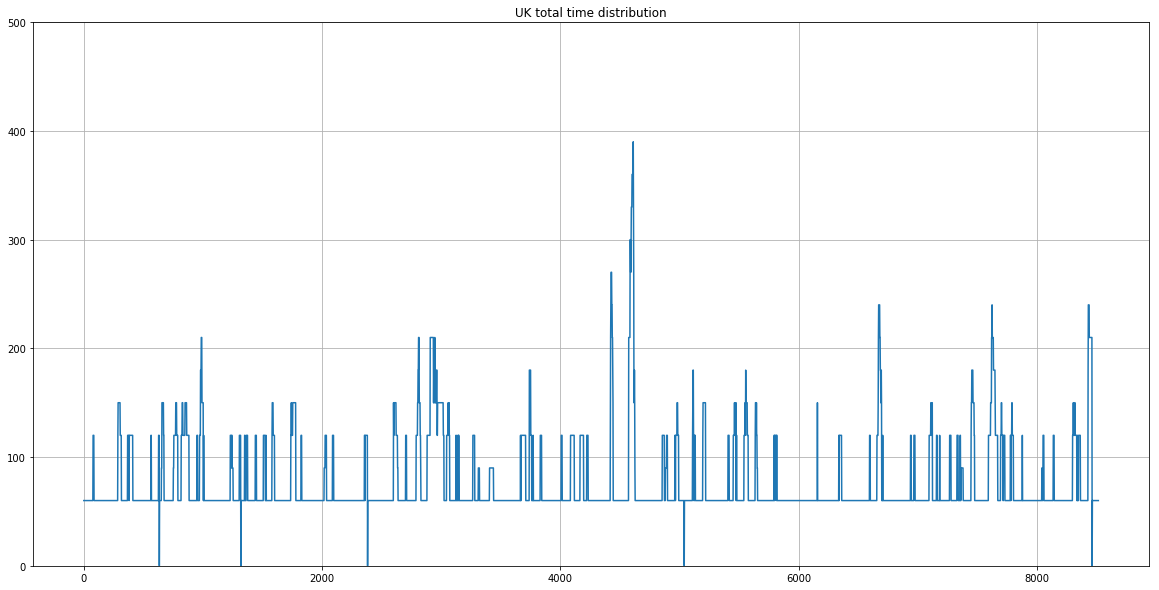

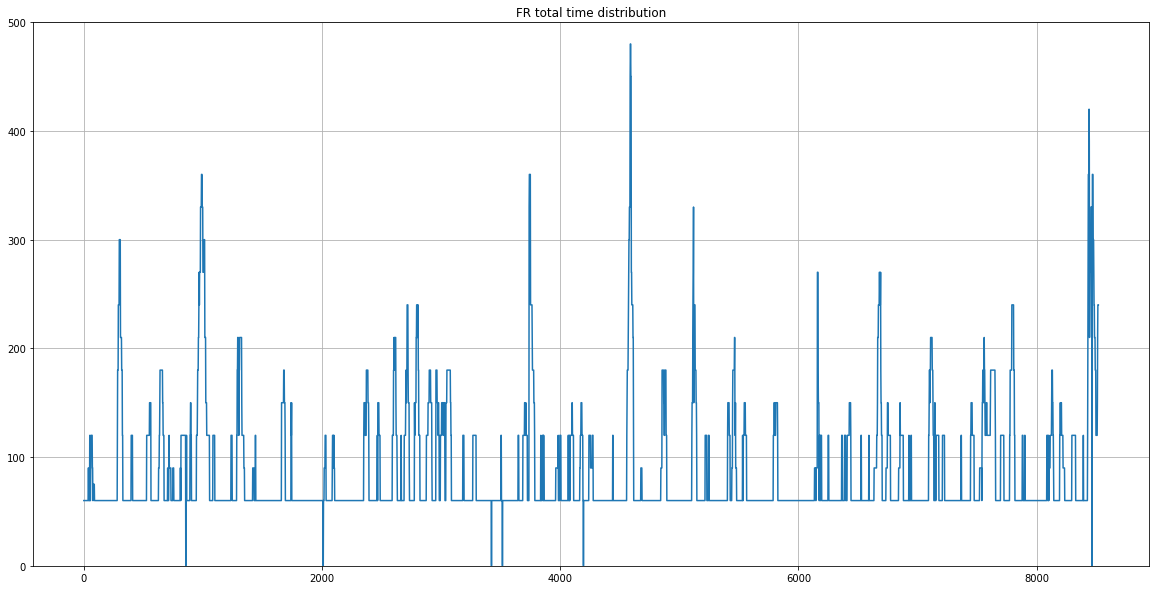

In [788]:
mmm = 500
plot_time_series(df['totaltime'], "Overall total time distribution", maxV=mmm)
plot_time_series(df_UK['totaltime'], "UK total time distribution", maxV=mmm)
plot_time_series(df_FR['totaltime'], "FR total time distribution", maxV=mmm)

In [1002]:
#### PREPARE THE DATA FOR PREDICTION, GET N VALUES AND PREDICT THE N+1
#### SO, WE NEED TO USE A SLIDING WINDOW OF TIMEFRAME SIZE, THE N+1th ELEMENT IS THE Y VALUE

time_frame = 30
sliding_window_size = time_frame

_train_series = df_FR['totaltime'].copy()
shifted = df_FR['totaltime'].copy()
for i in range(sliding_window_size):
    _train_series = pd.concat([_train_series, shifted.shift(-(i+1))], axis=1)

_train_series.dropna(axis=0, inplace=True)
_train_series.head()

,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,...,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime,totaltime
1,60,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,120.0,60.0,60.0,60.0,90.0,120.0
3,60,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,120.0,60.0,60.0,60.0,90.0,120.0,120.0
5,60,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,120.0,60.0,60.0,60.0,90.0,120.0,120.0,120.0
7,60,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,120.0,60.0,60.0,60.0,90.0,120.0,120.0,120.0,120.0
9,60,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,120.0,60.0,60.0,60.0,90.0,120.0,120.0,120.0,120.0,120.0


In [1014]:
train_series = _train_series.sample(frac=0.95)
test_series = _train_series.sample(frac=0.05)

X_train = train_series.values[:,0:time_frame]
y_train = train_series.values[:,time_frame-1:time_frame]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

X_test = test_series.values[:,0:time_frame]
y_test = test_series.values[:,time_frame-1:time_frame]

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [1021]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

input_neurons = time_frame
smart_neurons = 256
model = Sequential()
model.add(LSTM(input_neurons, activation="relu", input_shape=(1,input_neurons), return_sequences=True)) #, input_shape=(smart_neurons,1)

#model.add(Dropout(0.05))
model.add(LSTM(smart_neurons, return_sequences=True))
#model.add(Dropout(0.05))
model.add(LSTM(smart_neurons))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_103 (LSTM)              (None, 1, 30)             7320      
_________________________________________________________________
lstm_104 (LSTM)              (None, 1, 256)            293888    
_________________________________________________________________
lstm_105 (LSTM)              (None, 256)               525312    
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 257       
Total params: 826,777
Trainable params: 826,777
Non-trainable params: 0
_________________________________________________________________


In [1022]:
epochs = 20
batch_size = 30
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False, validation_split=0.1)

Train on 3616 samples, validate on 402 samples
Epoch 1/20
3616/3616 [==============================] - 13s 4ms/step - loss: 6559.1680 - acc: 2.7655e-04 - val_loss: 5273.2394 - val_acc: 0.0000e+00
Epoch 2/20
3616/3616 [==============================] - 5s 1ms/step - loss: 4063.4524 - acc: 0.0000e+00 - val_loss: 3854.5209 - val_acc: 0.0000e+00
Epoch 3/20
3616/3616 [==============================] - 5s 1ms/step - loss: 3173.0850 - acc: 0.0418 - val_loss: 3271.9499 - val_acc: 0.0000e+00
Epoch 4/20
3616/3616 [==============================] - 5s 1ms/step - loss: 2847.6654 - acc: 0.0000e+00 - val_loss: 3067.9015 - val_acc: 0.0000e+00
Epoch 5/20
3616/3616 [==============================] - 5s 1ms/step - loss: 2751.9873 - acc: 0.0000e+00 - val_loss: 3006.5614 - val_acc: 0.0000e+00
Epoch 6/20
3616/3616 [==============================] - 5s 1ms/step - loss: 2730.1901 - acc: 0.0000e+00 - val_loss: 2989.6038 - val_acc: 0.0000e+00
Epoch 7/20
3616/3616 [==============================] - 5s 1ms/step 

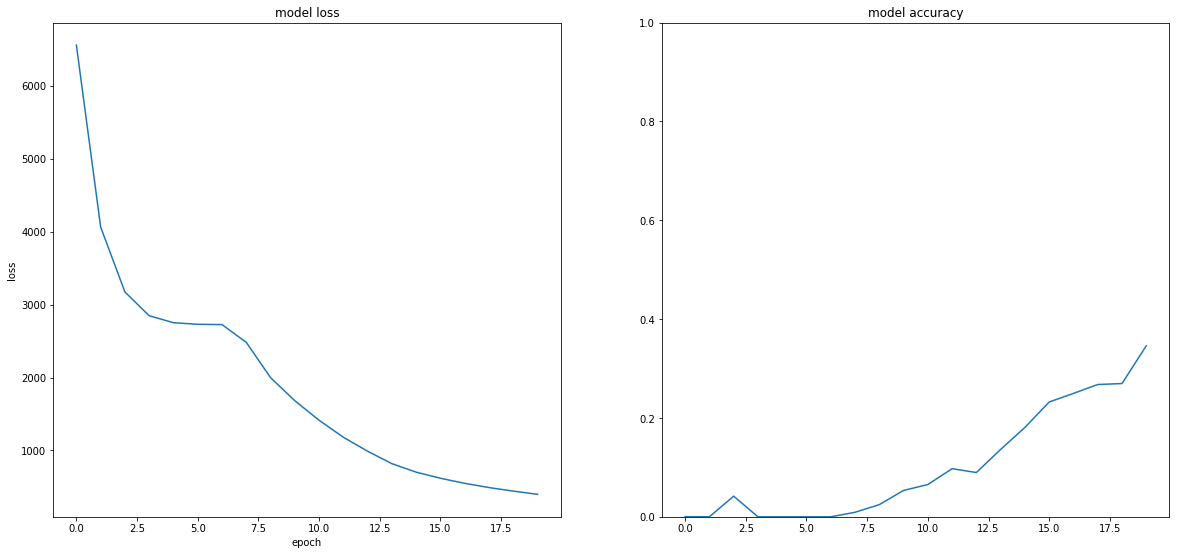

In [1031]:
plt.subplots(1, 2, sharey=True, figsize=(20,20))
plt.subplot(221)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(222)
plt.title('model accuracy')
plt.ylim(0,1,0.01)
plt.plot(history.history['acc'])
plt.show()

### Build a simple "less ambitious" predictive model with 4 dimension vectors

In [1051]:
#### Build data for our model
### For production model we need to adjust minutes to quarters or half hours for better performance

_mod_df = df_FR.copy()

_mod_df['hour'] = _mod_df.apply(lambda row: datetime.datetime.strptime(row['retrievaldate'][0:19], '%Y-%m-%d %H:%M:%S').time().hour, axis=1)
_mod_df['minute'] = _mod_df.apply(lambda row: datetime.datetime.strptime(row['retrievaldate'][0:19], '%Y-%m-%d %H:%M:%S').time().minute, axis=1)
mod_df = _mod_df[['idterminal', 'dow', 'hour', 'minute', 'totaltime']].copy()

train_series = mod_df.sample(frac=0.95)
test_series = _mod_df.sample(frac=0.05)

X_train = train_series.values
y_train = test_series.values

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test  = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


ValueError: cannot reshape array of size 6330 into shape (211,1,1)

In [1049]:

X_train


array([[[  2,   0,  22,  42, 120]],

       [[  2,   5,  22,  13,  60]],

       [[  2,   0,  21,  43,  60]],

       ...,

       [[  2,   3,   6,  42,  60]],

       [[  2,   2,  21,  42,  60]],

       [[  2,   1,  19,  12,  60]]])

,terminal,servicetype,departures,waitingtimeminutes,journeytimeminutes,delayreason,retrievaldate,latitude,longitude,trend,totaltime,dow,idterminal,hour,minute
1,F,normal,4,0,60,none/unknown,2018-02-01 00:13:06.57,50.9239,1.81604,stable,60,3,2,0,13
3,F,normal,5,0,60,none/unknown,2018-02-01 00:42:54.08,50.9239,1.81604,stable,60,3,2,0,42
5,F,normal,5,0,60,none/unknown,2018-02-01 01:12:54.23,50.9239,1.81604,stable,60,3,2,1,12
7,F,normal,6,0,60,none/unknown,2018-02-01 01:42:53.785,50.9239,1.81604,stable,60,3,2,1,42
9,F,normal,5,0,60,none/unknown,2018-02-01 02:13:06.647,50.9239,1.81604,stable,60,3,2,2,13


### NOW we need to correlate the to features, day of week and number of departures

In [349]:
### JUST PUT ALL TOGETHER TO MAKE OUR POINT CLEAR

In [286]:
db = DBSCAN(eps=0.3, min_samples=10).fit(reg)

In [292]:
labels = db.labels_
n_clusters_ = np.max(db.labels_) + 1

In [293]:
n_clusters_

36

In [316]:
reg[1,:]

array([2, 3, 0])

In [310]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=21, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [355]:
reg_FR

array([[ 2,  3,  0],
       [ 2,  3,  0],
       [ 2,  3,  0],
       ...,
       [ 2,  0, 60],
       [ 2,  0, 60],
       [ 2,  0, 60]])

In [ ]:
    km = KMeans(n_clusters=21).fit(reg)
    labels = km.labels_

